# Modeling

Pooja Umathe


Linear Regression is a linear approach for modelling the relationship between a scalar dependent variable y and one or more explanatory variables (or independent variables) denoted X. The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression.

Linear regression models are often fitted using the least squares approach, but they may also be fitted in other ways, such as by minimizing the "lack of fit" in some other norm (as with least absolute deviations regression), or by minimizing a penalized version of the least squares cost function as in ridge regression (L2-norm penalty) and lasso (L1-norm penalty).

In [1]:
#Loading all the relevant libraries

from __future__ import division, print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import packages for analysis and modeling
import statsmodels.api as sm # statistical models (including regression)
import statsmodels.formula.api as smf # statistical models (including regression)

# Models
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesClassifier
from sklearn.linear_model import Ridge, Lasso
from sklearn import cluster
from sklearn.neighbors import KNeighborsClassifier

# For scaling/normalizing values
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Importing data 

df = pd.read_csv("QDOBAMerged_MatrixVersion.csv")


In [3]:
df.head(3)

,Unnamed: 0,Location,Address,City_x,State_x,Zipcode,Competitors,County,Latitude,Longitude,...,TotHouse_medium,TotHouse_high,TotHouse_veryhigh,TotHouse_upper,TotHunits_medium,TotHunits_high,TotHunits_veryhigh,TotHunits_upper,FIPS,StoreSales
0,0,Halsey,64 Halsey St,Newark,NJ,7102,2,ESSEX,40.735502,-74.172845,...,0,0,0,0,0,0,0,0,34013,641068.222610
1,1,Newark Airport,10 Toler Place,Newark,NJ,7114,3,ESSEX,40.697442,-74.166362,...,0,0,0,0,1,0,0,0,34013,593444.838546
2,2,Union,2268 US Highway 22 E,Union,NJ,7083,1,UNION,40.693475,-74.267224,...,0,0,0,1,0,0,0,1,34039,652391.301492


In [4]:
df.columns

Index(['Unnamed: 0', 'Location', 'Address', 'City_x', 'State_x', 'Zipcode',
       'Competitors', 'County', 'Latitude', 'Longitude', 'CountyLat',
       'CountyLong', 'Undergraduate', 'Graduate', 'HSGrad', 'LessHS',
       'HouseHoldSize', 'Diversity_medium', 'Diversity_high',
       'Diversity_veryhigh', 'Diversity_upper', 'MedianInc_medium',
       'MedianInc_high', 'MedianInc_veryhigh', 'MedianInc_upper', 'Pop_medium',
       'Pop_high', 'Pop_veryhigh', 'Pop_upper', 'MedianAg_under40',
       'MedianAg_under42', 'MedianAg_above41', 'TotHouse_medium',
       'TotHouse_high', 'TotHouse_veryhigh', 'TotHouse_upper',
       'TotHunits_medium', 'TotHunits_high', 'TotHunits_veryhigh',
       'TotHunits_upper', 'FIPS', 'StoreSales'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 42 columns):
Unnamed: 0            34 non-null int64
Location              34 non-null object
Address               34 non-null object
City_x                34 non-null object
State_x               34 non-null object
Zipcode               34 non-null int64
Competitors           34 non-null int64
County                34 non-null object
Latitude              34 non-null float64
Longitude             34 non-null float64
CountyLat             34 non-null float64
CountyLong            34 non-null float64
Undergraduate         34 non-null int64
Graduate              34 non-null int64
HSGrad                34 non-null int64
LessHS                34 non-null int64
HouseHoldSize         34 non-null int64
Diversity_medium      34 non-null int64
Diversity_high        34 non-null int64
Diversity_veryhigh    34 non-null int64
Diversity_upper       34 non-null int64
MedianInc_medium      34 non-null int64
Medi

In [6]:
df.describe()

,Unnamed: 0,Zipcode,Competitors,Latitude,Longitude,CountyLat,CountyLong,Undergraduate,Graduate,HSGrad,...,TotHouse_medium,TotHouse_high,TotHouse_veryhigh,TotHouse_upper,TotHunits_medium,TotHunits_high,TotHunits_veryhigh,TotHunits_upper,FIPS,StoreSales
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,...,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,16.500000,7873.823529,2.176471,40.458534,-74.507016,40.439504,-74.511329,9823.382353,5793.411765,12146.058824,...,0.205882,0.176471,0.205882,0.205882,0.205882,0.176471,0.205882,0.205882,34020.647059,591759.418214
std,9.958246,618.777557,0.968303,0.497323,0.368602,0.536819,0.351578,6675.649895,5073.151104,8011.114064,...,0.410426,0.386953,0.410426,0.410426,0.410426,0.386953,0.410426,0.410426,11.656400,69803.865681
min,0.000000,7002.000000,1.000000,38.985802,-75.449672,39.086142,-75.357356,960.000000,252.000000,1008.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34001.000000,460318.642785
25%,8.250000,7335.000000,1.000000,40.261257,-74.738154,40.282503,-74.700757,5090.250000,1906.500000,7098.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34013.000000,558706.688760
50%,16.500000,7854.500000,2.000000,40.647419,-74.453451,40.612696,-74.477506,8084.500000,4119.000000,10535.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34021.000000,586253.773696
75%,24.750000,8277.500000,3.000000,40.772529,-74.229790,40.836947,-74.246136,14270.250000,8411.250000,14548.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34028.500000,630839.812152
max,33.000000,8854.000000,4.000000,40.957694,-74.029994,41.137424,-74.074522,29186.000000,24016.000000,34697.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,34041.000000,742735.524972


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,34.0,16.500000,9.958246,0.000000,8.250000,16.500000,24.750000,33.000000
Zipcode,34.0,7873.823529,618.777557,7002.000000,7335.000000,7854.500000,8277.500000,8854.000000
Competitors,34.0,2.176471,0.968303,1.000000,1.000000,2.000000,3.000000,4.000000
Latitude,34.0,40.458534,0.497323,38.985802,40.261257,40.647419,40.772529,40.957694
Longitude,34.0,-74.507016,0.368602,-75.449672,-74.738154,-74.453451,-74.229790,-74.029994
CountyLat,34.0,40.439504,0.536819,39.086142,40.282503,40.612696,40.836947,41.137424
CountyLong,34.0,-74.511329,0.351578,-75.357356,-74.700757,-74.477506,-74.246136,-74.074522
Undergraduate,34.0,9823.382353,6675.649895,960.000000,5090.250000,8084.500000,14270.250000,29186.000000
Graduate,34.0,5793.411765,5073.151104,252.000000,1906.500000,4119.000000,8411.250000,24016.000000
HSGrad,34.0,12146.058824,8011.114064,1008.000000,7098.000000,10535.000000,14548.250000,34697.000000


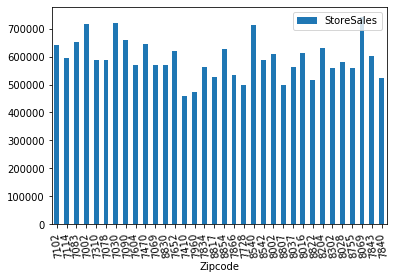

In [8]:
df.plot.bar(x = 'Zipcode', y = 'StoreSales', rot = 100)

C:\Users\pooja\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


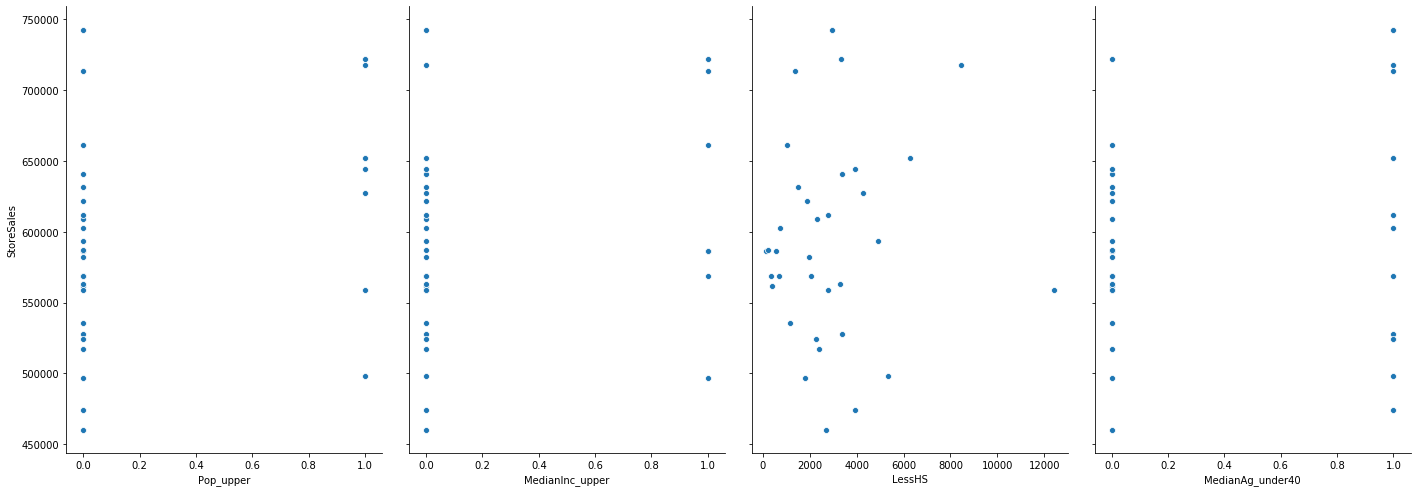

In [9]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(df, x_vars=['Pop_upper','MedianInc_upper','LessHS','MedianAg_under40'], y_vars='StoreSales', size=7, aspect=0.7)

Text(0.5, 1.0, 'StoreSales vs Zipcode')

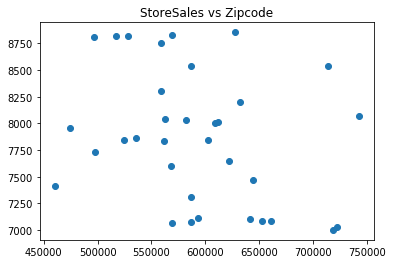

In [10]:
plt.scatter(df.StoreSales,df.Zipcode)
plt.title("StoreSales vs Zipcode")

Text(0.5, 1.0, 'StoreSales vs Pop_high')

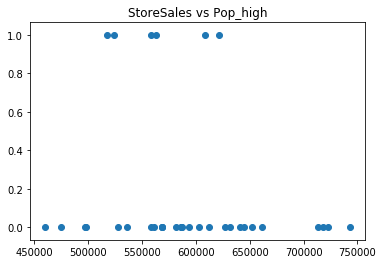

In [11]:
plt.scatter(df.StoreSales,df.Pop_high)
plt.title("StoreSales vs Pop_high")

In [12]:
#Count distinct values for each column in Data frame
df.apply(lambda x: len(x.unique()))

Unnamed: 0            34
Location              34
Address               25
City_x                32
State_x                1
Zipcode               34
Competitors            4
County                21
Latitude              34
Longitude             34
CountyLat             21
CountyLong            21
Undergraduate         34
Graduate              34
HSGrad                34
LessHS                34
HouseHoldSize          2
Diversity_medium       2
Diversity_high         2
Diversity_veryhigh     2
Diversity_upper        2
MedianInc_medium       2
MedianInc_high         2
MedianInc_veryhigh     2
MedianInc_upper        2
Pop_medium             2
Pop_high               2
Pop_veryhigh           2
Pop_upper              2
MedianAg_under40       2
MedianAg_under42       2
MedianAg_above41       2
TotHouse_medium        2
TotHouse_high          2
TotHouse_veryhigh      2
TotHouse_upper         2
TotHunits_medium       2
TotHunits_high         2
TotHunits_veryhigh     2
TotHunits_upper        2


In [13]:
df = df.drop(["Location", "Address", "City_x", "State_x", "County", "Longitude", "Latitude", "CountyLong","Unnamed: 0"], axis=1)

In [14]:
df.head(3)

,Zipcode,Competitors,CountyLat,Undergraduate,Graduate,HSGrad,LessHS,HouseHoldSize,Diversity_medium,Diversity_high,...,TotHouse_medium,TotHouse_high,TotHouse_veryhigh,TotHouse_upper,TotHunits_medium,TotHunits_high,TotHunits_veryhigh,TotHunits_upper,FIPS,StoreSales
0,7102,2,40.787216,1961,1058,5490,3363,2,0,0,...,0,0,0,0,0,0,0,0,34013,641068.222610
1,7114,3,40.787216,960,252,9600,4910,3,0,0,...,0,0,0,0,1,0,0,0,34013,593444.838546
2,7083,1,40.659871,15757,5785,27272,6281,3,0,0,...,0,0,0,1,0,0,0,1,34039,652391.301492


## Features Selection

In [15]:

X = df.iloc[:,0:32]  #independent columns
y = df.iloc[:,-1]    #target column

y = y.astype('int')

### 1. Univariate Selection

In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 15 best features

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score')) 

                 Specs          Score
5               HSGrad  174367.038119
3        Undergraduate  149706.271953
4             Graduate  146600.394505
6               LessHS   72127.805722
0              Zipcode    1604.712995
21    MedianAg_under42      31.000000
10  Diversity_veryhigh      28.000000
24       TotHouse_high      28.000000
13      MedianInc_high      28.000000
17            Pop_high      28.000000


### 2. Feature Importance

C:\Users\pooja\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.07272727 0.05151515 0.08181818 0.03939394 0.04242424 0.06969697
 0.07272727 0.03030303 0.02121212 0.03333333 0.02424242 0.01212121
 0.02121212 0.01818182 0.02121212 0.01212121 0.02121212 0.01818182
 0.01818182 0.02727273 0.03030303 0.01818182 0.03636364 0.01515152
 0.01212121 0.01818182 0.01212121 0.01818182 0.01515152 0.01818182
 0.02121212 0.07575758]


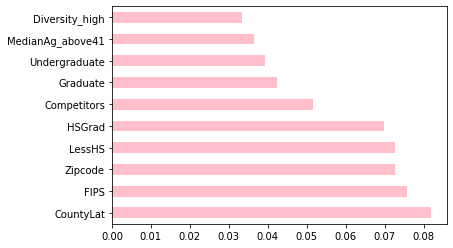

In [17]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', color='pink')
plt.show()

In [18]:
feat_importances.nlargest(10)

CountyLat           0.081818
FIPS                0.075758
Zipcode             0.072727
LessHS              0.072727
HSGrad              0.069697
Competitors         0.051515
Graduate            0.042424
Undergraduate       0.039394
MedianAg_above41    0.036364
Diversity_high      0.033333
dtype: float64

### 3.Correlation Matrix with Heatmap

In [19]:
df1 = df[['TotHouse_upper','TotHouse_medium','Diversity_upper','TotHouse_high','Diversity_veryhigh',
          'MedianInc_upper','MedianInc_veryhigh','HouseHoldSize','MedianAg_under42','StoreSales']]

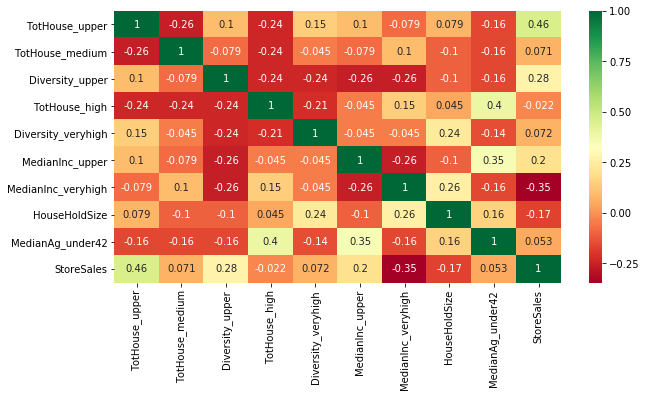

In [20]:
#get correlations of each features in dataset
corrmat = df1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,5))
#plot heat map
g=sns.heatmap(df1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [21]:
dfnum_corr = df1.corr()['StoreSales'][:-1] # -1 because StoreSales last column
golden_features_list = dfnum_corr[abs(dfnum_corr) > 0.1].sort_values(ascending=False)
print("There are  {} strongly correlated values with StoreSales:\n{}".format(len(golden_features_list), 
                                                                             golden_features_list))

There are  5 strongly correlated values with StoreSales:
TotHouse_upper        0.458939
Diversity_upper       0.275384
MedianInc_upper       0.204748
HouseHoldSize        -0.168707
MedianInc_veryhigh   -0.345068
Name: StoreSales, dtype: float64


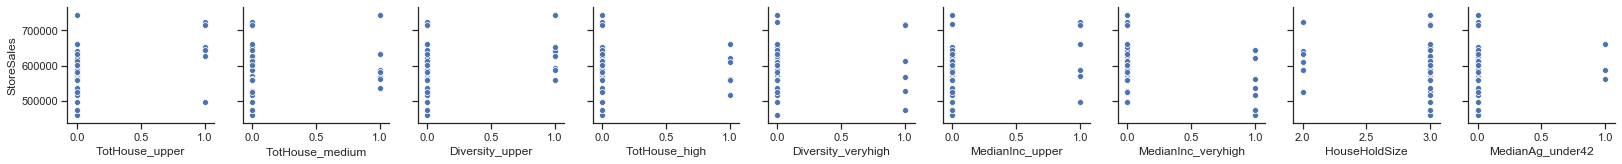

In [22]:
# Visualizing the dependancy of StoreSales on each feature
import seaborn as sns

sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df1,
                 kind='scatter', y_vars=['StoreSales'],
                 x_vars=['TotHouse_upper','TotHouse_medium','Diversity_upper','TotHouse_high','Diversity_veryhigh',
                         'MedianInc_upper','MedianInc_veryhigh','HouseHoldSize','MedianAg_under42'])

In [23]:
# Scale all input features to between 0 and 1.
#min_max_scaler = MinMaxScaler()
#df = pd.DataFrame(data=min_max_scaler.fit_transform(df),
                    #columns=df.columns, index=df.index)

In [24]:
from sklearn.model_selection import train_test_split

X = df1.copy().drop(['StoreSales'], axis=1).values
y = df1.loc[:, 'StoreSales'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [25]:
# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              120.5
Date:                Mon, 11 Nov 2019   Prob (F-statistic):                    2.52e-18
Time:                        19:12:47   Log-Likelihood:                         -435.89
No. Observations:                  34   AIC:                                      889.8
Df Residuals:                      25   BIC:                                      903.5
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          9.418e+04   4.93e+04      1.910      0.068   -7353.437    1.96e+05
x2          1.078e+05   4.87e+04      2.214      0.036    7526.059    2.08e+05
x3          1.054e+05   5.43e+04      1.943      0.063   -6329.807    2.17e+05
x4          1.155e+05   5.84e+04      1.976      0.059   -4863.990    2.36e+05
x5          1.613e+04   5.42e+04      0.297      0.769   -9.56e+04    1.28e+05
x6          9.709e+04   5.25e+04      1.850      0.076    -1.1e+04    2.05e+05
x7         -6.629e+04    5.2e+04     -1.275      0.214   -1.73e+05    4.08e+04
x8          1.773e+05   1.53e+04     11.618      0.000    1.46e+05    2.09e+05
x9         -7.008e+04    7.8e+04     -0.899      0.377   -2.31e+05    9.05e+04
==============================================================================
Omnibus:                        2.403   Durbin-Watson:                   1.782
Prob(Omnibus):                  0.301   Jarque-Bera (JB):                2.005
Skew:                           0.468   Prob(JB):                        0.367
Kurtosis:                       2.266   Cond. No.                         13.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# Printing actual vs predicted values
pred = pd.DataFrame({'Actual': y.flatten(), 'Predicted': predictions.flatten()})
pred

,Actual,Predicted
0,641068.222610,460004.971647
1,593444.838546,637303.784042
2,652391.301492,731486.235016
3,718041.900365,642209.273926
4,586253.158030,559461.403979
5,586254.389363,558905.171678
6,722255.622297,545866.323716
7,661372.265821,674396.844126
8,568604.082189,531896.437187
9,644506.664403,559786.424261


In [27]:
pred.to_csv('Actual_vs_pred_storesales.csv')

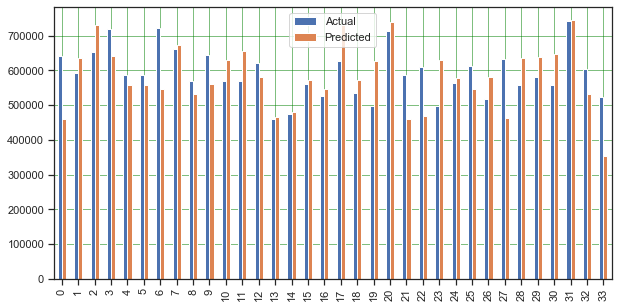

In [28]:
# Plotting the actual vs predicted values for Linear OLS model
dflinear = pred
dflinear.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

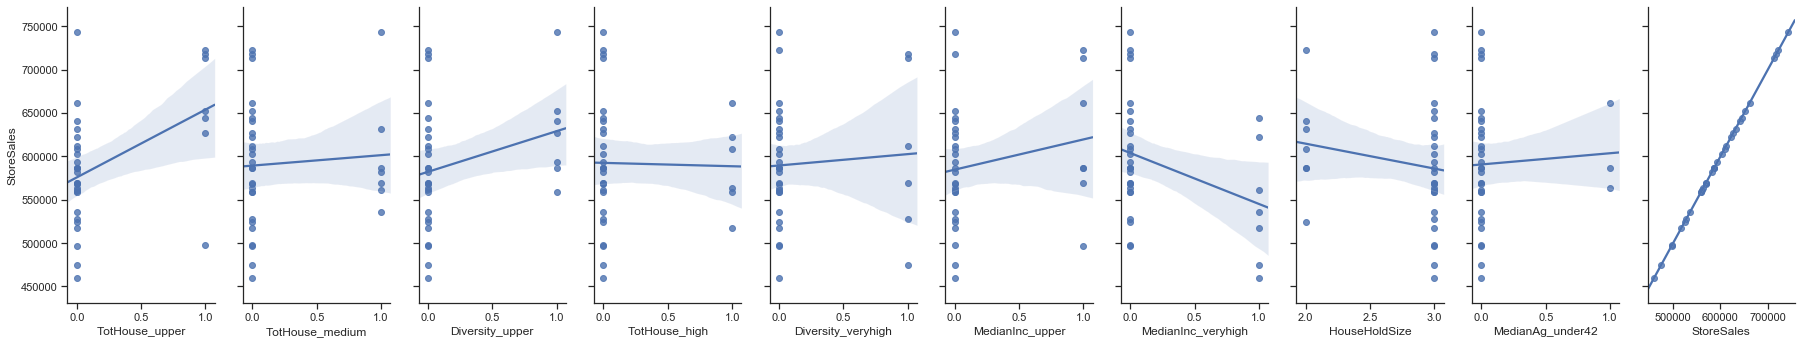

In [30]:
sns.pairplot(df1, x_vars=['TotHouse_upper','TotHouse_medium','Diversity_upper','TotHouse_high',
                          'Diversity_veryhigh','MedianInc_upper','MedianInc_veryhigh','HouseHoldSize',
                          'MedianAg_under42','StoreSales'], y_vars='StoreSales', size=5, aspect=0.5, kind='reg')

In [31]:
# Linear Model

In [32]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
model_l = lm.fit(X_train,y_train)

predictions_l = lm.predict(X_test)


In [33]:
predictions_l

array([603273.35782996, 681417.1590636 , 557056.33679101, 682574.4692398 ,
       682574.4692398 , 572394.48952857, 623884.2653024 , 557056.33679101,
       545568.02064929, 560860.56439828, 598926.6640265 ])

In [34]:
# Getting Rsquare Score
lm.score(X_train,y_train)

0.5005790582990972

In [35]:
# Getting predicted coefficients
lm.coef_

array([104907.22497635,  46217.02103895,  51552.8209104 ,  72812.24067345,
        30941.91343796,  19453.59729624, -26532.17449792, -34746.14104523,
        15912.55532662])

In [36]:
lm.intercept_

630352.846488743

In [37]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions_l)

0.47314312275913717

In [38]:
# Printing actual vs predicted values
pred_l = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': predictions_l.flatten()})
pred_l

,Actual,Predicted
0,568884.929616,603273.357830
1,713738.318803,681417.159064
2,612133.855362,557056.336791
3,627383.211079,682574.469240
4,652391.301492,682574.469240
5,517490.142827,572394.489529
6,742735.524972,623884.265302
7,527852.327109,557056.336791
8,569058.334173,545568.020649
9,524486.341462,560860.564398


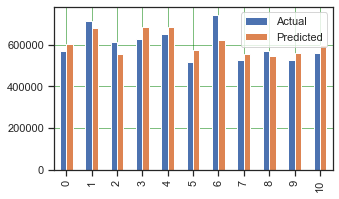

In [39]:
# Plotting the actual vs predicted values for Linear regression model
dflinear = pred_l
dflinear.plot(kind='bar',figsize=(5,3))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train,y_train)

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1,5,10, 20]}

ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)

ridge_regressor.fit(X_train, y_train)



C:\Users\pooja\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [41]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

# predicting the test dataset

ridgey_pred = ridge.predict(X_test)

ridgey_pred

{'alpha': 5}
-4641355764.901924


array([583998.24905425, 644773.07593491, 569008.75280284, 637565.07467463,
       637565.07467463, 567197.26031818, 587076.14712161, 569008.75280284,
       564988.62270595, 591918.08746408, 592511.49509236])

In [42]:
ridge.coef_

array([ 65478.42380442,  14989.49625141,  17383.9274919 ,  37808.77171406,
        14306.02942453,  10285.89932765, -25314.23477418, -37215.36408578,
        12578.77494001])

In [43]:
# intercepts
print(ridge.intercept_)


666348.8156356317


In [44]:
# Model Evaluation

# calculating the  R squared error value
from sklearn.metrics import r2_score
r2_score(y_test,ridgey_pred)

0.29185960129551036

In [45]:
# Printing actual vs predicted values
predict = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': ridgey_pred.flatten()})
predict

,Actual,Predicted
0,568884.929616,583998.249054
1,713738.318803,644773.075935
2,612133.855362,569008.752803
3,627383.211079,637565.074675
4,652391.301492,637565.074675
5,517490.142827,567197.260318
6,742735.524972,587076.147122
7,527852.327109,569008.752803
8,569058.334173,564988.622706
9,524486.341462,591918.087464


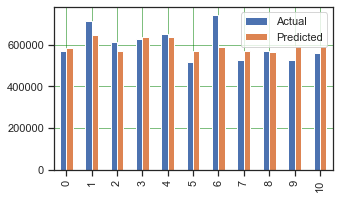

In [46]:
# Plotting the actual vs predicted values ridge model
dfridge = predict
dfridge.plot(kind='bar',figsize=(5,3))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [47]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train,y_train)

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

lasso_regressor.fit(X_train, y_train)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

# predicting the test dataset

lassoy_pred = lasso.predict(X_test)

lassoy_pred


{'alpha': 20}
-9503787337.52379


C:\Users\pooja\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20473247120.833256, tolerance: 7976336.783324958
  positive)
C:\Users\pooja\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17462993667.450584, tolerance: 8731494.355502632
  positive)
C:\Users\pooja\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17753837023.84814, tolerance: 7073363.737437487
  positive)
C:\Users\pooja\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

array([603245.32578844, 681383.21075428, 557055.04150953, 682547.14092322,
       682547.14092322, 572395.42311312, 623850.79786439, 557055.04150953,
       545579.87060674, 560887.08471582, 598927.51445035])

In [48]:
lasso.coef_

array([104886.62733774,  46190.28427891,  51522.18488575,  72789.18575061,
        30916.7128098 ,  19441.541907  , -26532.09133723, -34748.75601608,
        15904.39018798])

In [49]:
# intercepts
print(lasso.intercept_)

# Model Evaluation

# calculating the  R squared error value
from sklearn.metrics import r2_score
r2_score(y_test,lassoy_pred)

630384.5967479814


0.47305438600922944

In [50]:
# Printing actual vs predicted values
predictlasso = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': lassoy_pred.flatten()})
predictlasso

,Actual,Predicted
0,568884.929616,603245.325788
1,713738.318803,681383.210754
2,612133.855362,557055.041510
3,627383.211079,682547.140923
4,652391.301492,682547.140923
5,517490.142827,572395.423113
6,742735.524972,623850.797864
7,527852.327109,557055.041510
8,569058.334173,545579.870607
9,524486.341462,560887.084716


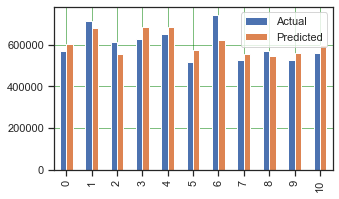

In [51]:
# Plotting the actual vs predicted values for Lasso model
dflasso = predictlasso
dflasso.plot(kind='bar',figsize=(5,3))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [52]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions_l))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions_l))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions_l)))


Mean Absolute Error: 46384.15306872276
Mean Squared Error: 2791361166.15784
Root Mean Squared Error: 52833.33385428029


In [53]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ridgey_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ridgey_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ridgey_pred)))


Mean Absolute Error: 45823.72396892259
Mean Squared Error: 3751826529.2142444
Root Mean Squared Error: 61252.15530260339


In [54]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lassoy_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lassoy_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lassoy_pred)))

Mean Absolute Error: 46384.2604724622
Mean Squared Error: 2791831305.8265114
Root Mean Squared Error: 52837.78293822056


In [55]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
rdf = RandomForestRegressor(n_estimators=30)
rdfreg = rdf.fit(X_train, y_train)

In [56]:
def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

# definte MAPE function
def mape(x, y): 
    return np.mean(np.abs((x - y) / x)) * 100 

print("Regresion Model Score" , ":" , rdfreg.score(X_train, y_train) , "," ,
      "Out of Sample Test Score" ,":" , rdfreg.score(X_test, y_test))   

yl_predicted = rdfreg.predict(X_train)
yl_test_predicted = rdfreg.predict(X_test)

print("Training RMSE", ":", rmse(y_train, yl_predicted),
      "Testing RMSE", ":", rmse(y_test, yl_test_predicted))
print("Training MAPE", ":", mape(y_train, yl_predicted),
      "Testing MAPE", ":", mape(y_test, yl_test_predicted))

Regresion Model Score : 0.6893987805759842 , Out of Sample Test Score : -0.17982911841585825
Training RMSE : 36935.31012103289 Testing RMSE : 79062.62775631536
Training MAPE : 4.77107237333694 Testing MAPE : 10.803614084307762


In [57]:
yl_test_predicted

array([591880.87093339, 631357.20539108, 592675.73915326, 546406.21409177,
       546406.21409177, 566208.1925253 , 579369.63087134, 592675.73915326,
       543812.55162285, 616879.01148022, 587634.97193684])

In [58]:
# Printing actual vs predicted values for Random Forest
predictrandom = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': yl_test_predicted.flatten()})
predictrandom

,Actual,Predicted
0,568884.929616,591880.870933
1,713738.318803,631357.205391
2,612133.855362,592675.739153
3,627383.211079,546406.214092
4,652391.301492,546406.214092
5,517490.142827,566208.192525
6,742735.524972,579369.630871
7,527852.327109,592675.739153
8,569058.334173,543812.551623
9,524486.341462,616879.011480


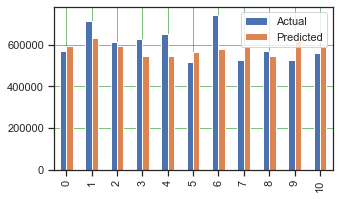

In [59]:
# Plotting the actual vs predicted values for Lasso model

predictrandom.plot(kind='bar',figsize=(5,3))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

C:\Users\pooja\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 0, 'Relative Importance')

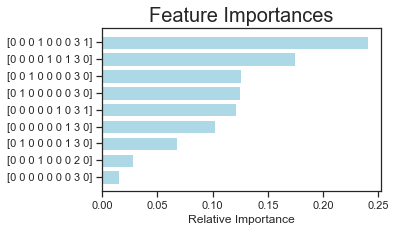

In [60]:
features = X_train
importances = rdfreg.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(5,3))
plt.title('Feature Importances', fontsize=20)
plt.barh(range(len(indices)), importances[indices], color='lightblue', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

### We will choose Linear ols model as we got best accuracy and good Rsquare value as compare to other models